<h1><center>Estimation du prix de l'immobilier</center></h1>

<h4><center>Projet r√©alis√© par Ak√© Esso KAMOUNA et Ath√™na BRISSE</center></h4>


<h2><center>1-Introduction</center></h2>


Pr√©dire le prix d'une maison repr√©sente une avanc√©e et une perspective consid√©rables face aux enjeux du monde de l'immobilier. Il est en effet primordial pour quiconque poss√®de un bien de pouvoir estimer sa valeur. Et grace au machine learning, il est possible d'aggr√©ger diff√©rentes informations telles que la superficie du bien immobilier, sa localisation, son ann√©e de r√©novation et bien d'autres particularit√©s pour avoir une estimation fid√®le de son prix de vente. C'est l'objet de notre projet. Nnous voyageons aux Etats-Unis, dans le comt√© de King ‚Äì  √âtat de Washington ‚Äì afin de pr√©dire le prix de vente des maisons.


Apr√®s une exploration des donn√©es afin de nous familiariser avec, nous utilisons diff√©rents mod√®les de r√©gression, ce projet s'inscrivant dans le cadre d'un cours dont nous voulions mettre √† profit les apprentissages. Raffin√©s manuellement ou non, nous les comparons. En prenant en compte le temps de computation et les difficult√©s pratiques inh√©rentes √† certains mod√®les, nous tentons de s√©lectionner celui qui obtient les meilleures performances

On va essayer de comprendre les facteurs d√©terminants dans la hausse du prix de vente, et tenter, comme le font d√©sormais de nombreuses entreprises immobili√®res, de pr√©dire ce prix avec la plus grande pr√©cision possible. 

<h2><center>2- Le dataset utilis√©</center></h2>

Le dataset est constitu√© d'informations concernant 21613 maisons vendues entre mai 2014 et mai 2015. 


Pour donner un peu de d√©tail, le dataset est compos√© de 21613 observations, de 21 variables chacunes.


*   id : Notation d'une maison
*   date : Date de vente de la maison
*   bedrooms : Nombre de chambres
*   bathrooms : Nombre de salles de bain
*   sqft_living  : Surface de la maison (square feet)
*   sqft_lot  : Surface du terrain (square feet)
*   sqft_above : Superficie de la maison hors sous-sol
*   sqft_basement : Superficie du sous-sol
*   floors  : Nombres d‚Äô√©tages 
*   waterfront  : Vue sur la  mer
*   vue  : Annonce qui a √©t√© vue 
*   condition : √âtat g√©n√©ral de la maison
*   note  : note globale attribu√©e √† l‚Äôhabitation, sur la base du syst√®me de notation du King County
*   yr_built : Ann√©e de construction
*   yr_renovated : Ann√©e de r√©novation de la maison
*   zipcode : Code postal
*   lat : Latitude
*   long : Longitude
*   price Le prix est l'objectif de la pr√©diction
*   sqft_living15 : Surface de la salle de s√©jour en 2015. Cela implique de potentielles r√©novations qui pourraient ou non avoir affect√© la surface du lot.
*   sqft_lot15 : Surface du terrain en 2015 (implique de potentielles r√©novations



 <h2><center>3- Les librairies utilis√©es</center></h2>

In [118]:
import os 
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import * 
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from scipy.stats import norm,skew,kurtosis
from xgboost import XGBRegressor
import time
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

<h2><center> 4- Un peu d'analyse exploratoire</center></h2> 

In [1]:
#data=pd.read_csv("/datasets/kc_house_data.csv")
#data.head()

In [98]:
data.drop(["date","id"],axis=1,inplace=True)
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Le prix minimum est sup√©rieur √† 0. Pas d‚Äôincoh√©rence de ce point de vue l√†, nous poursuivons. 


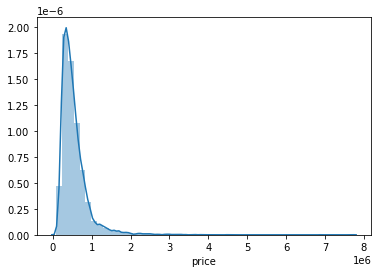

In [92]:
sns.distplot(data['price'])

Cette distribution montre que les prix s‚Äô√©cartent de la distribution normale. 
Cette distribution pr√©sente un pics avec une asym√©trie positive. Pour r√©duire le risque de mauvaises pr√©dictions, il nous para√Æt pr√©f√©rable d'approximer la distribution des donn√©es par une loi normale.



In [93]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 4.024069
Kurtosis: 34.585540


La Skewness est positive : les donn√©es sont inclin√©es vers la droite, donc vers un prix plus √©lev√©. La Kurtosis montre une valeur extr√™mement √©lev√©e, qui peut √™tre expliqu√©e par la queue de distribution assez cons√©quente, avec des prix qui peuvent monter jusque tr√®s haut. 
D'apr√®s le graphiques ci-dessus, on peut voir que tr√®s peu de maisons pr√©sentent des prix tr√®s √©loign√©s des autres, comme un prix d'environ 7 000 000 dollars. De plus, l‚Äôon peut imaginer que dans des ensembles de donn√©es r√©els, il y aura toujours des valeurs aberrantes, comme les prix des maisons de luxe. C'est pourquoi on d√©cide de ne pas supprimer les valeurs aberrantes.


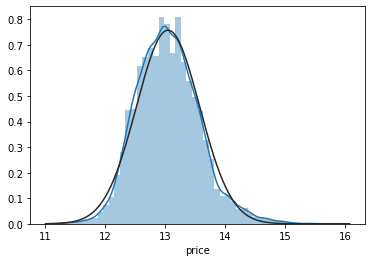

In [94]:
data['price'] = np.log1p(data['price'])
sns.distplot(data['price'],fit=norm)

In [95]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 0.428077
Kurtosis: 0.691857


La Skewness et la Kurtosis sont bien proches de z√©ro, ce qui est bon signe dans l'optique de normalisation dans laquelle nous sommes. 

 <h4><center>4.1 Relation Prix et autres variables </center></h4>  

 <h4><center>Variables continues</center></h4> 

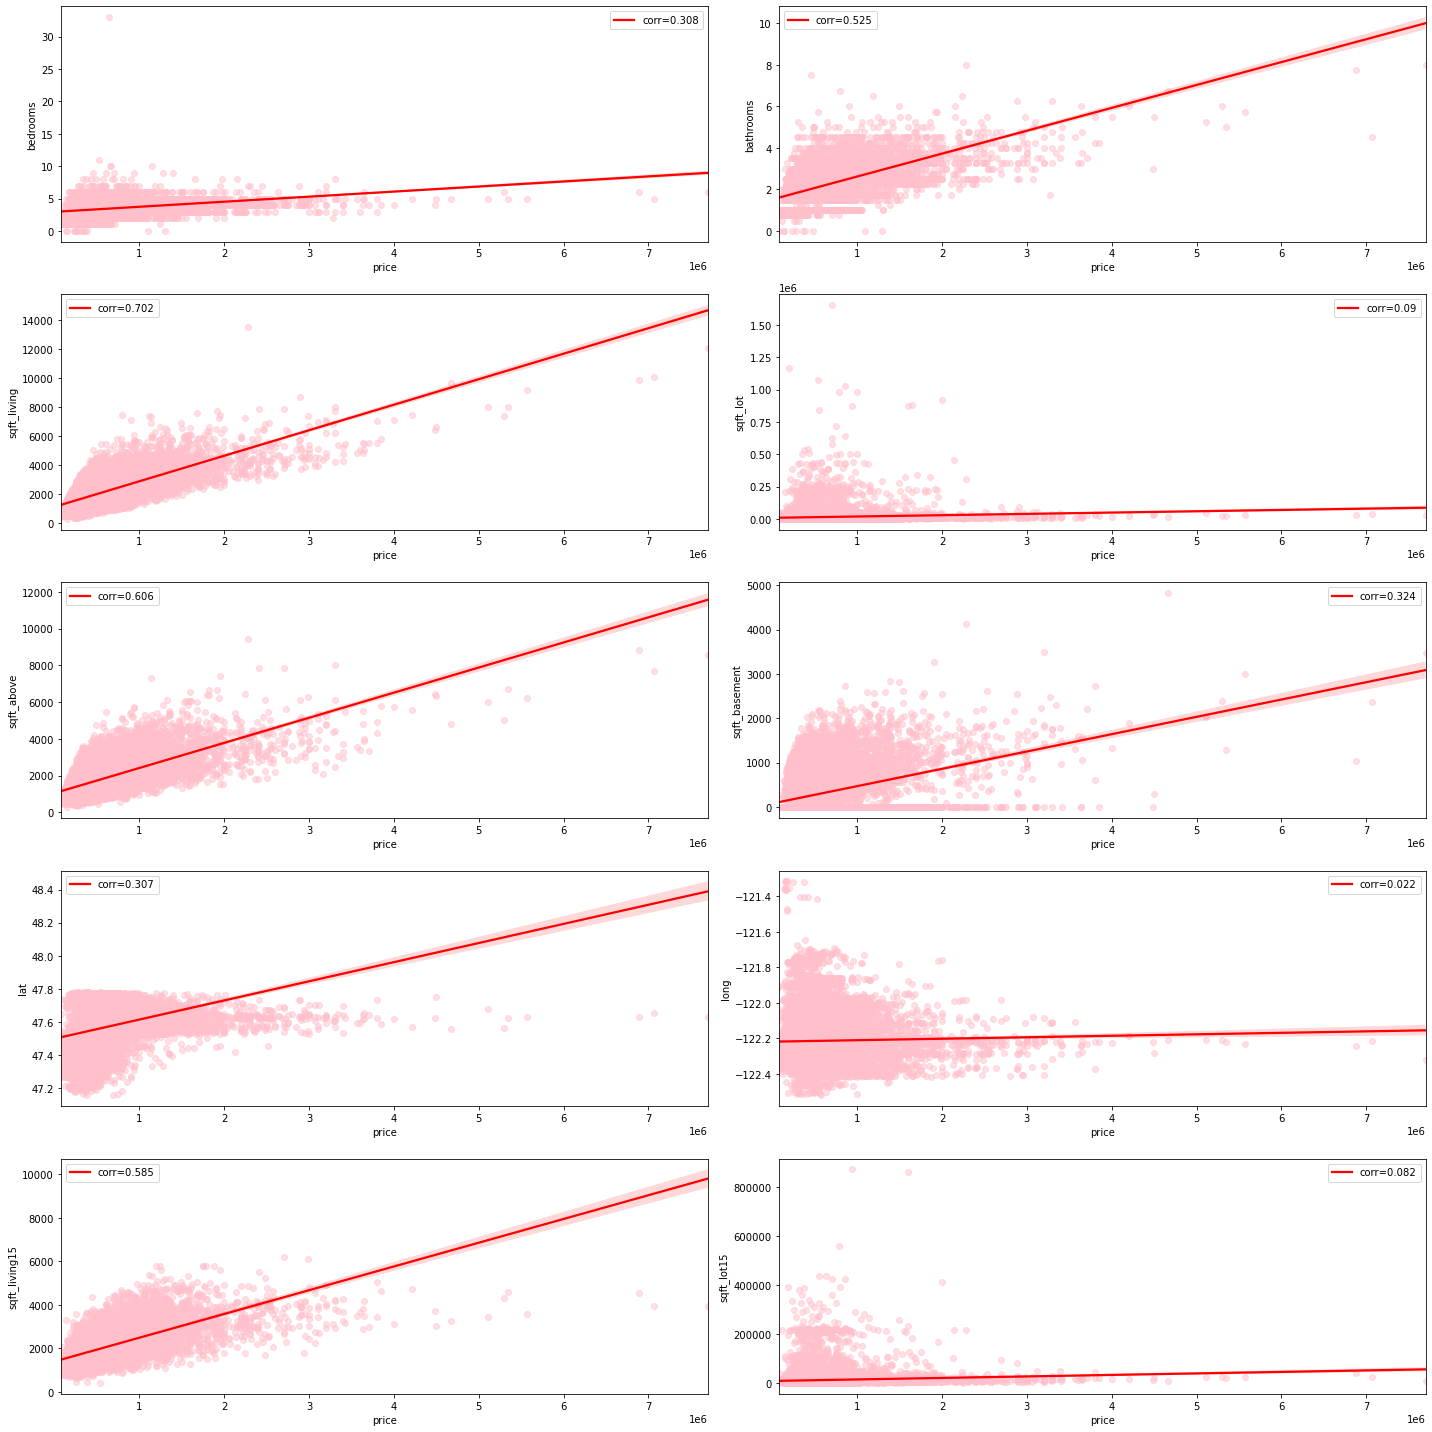

In [99]:
fig , axs = plt.subplots(nrows=5 , ncols=2 , figsize=(20, 20))
axs = axs.ravel()

for i , col in enumerate(data.columns.drop(['yr_renovated',
                                            'zipcode', 'condition','grade',
                                            'price','waterfront','floors','yr_built','view'])) :
    sns.regplot(data=data , x='price' , y=col ,scatter_kws={'alpha':0.5 , 
                                                            'color' : 'pink'},
                line_kws={'color' : 'red'} , ax=axs[i])
    corr = data.corr().sort_values('price')['price'].loc[col].round(3)
    axs[i].legend([f'corr={corr}'])
plt.tight_layout()

D'apr√®s ce qui pr√©c√®de, nous pouvons constater que la superficie au-dessus du sol (sqft_above), la note globale attribu√©e au logement (grade) et la superficie de la maison (sqft_living) sont les caract√©ristiques qui sont les plus corr√©l√©es avec le prix des maisons.

Ils semblent reli√©s lin√©airement entre eux.

 <h4><center>Variables discretes</center></h4> 

Pour d√©terminer le nombre de chambres, d'√©tages ou de salles de bain/chambres par rapport au prix, on pr√©f√®re utiliser des boxplot car nous avons des donn√©es num√©riques mais elles ne sont pas continues comme 1,2,... chambres, 2.5, 3,... √©tages (probablement 0.5 pour le penthouse).

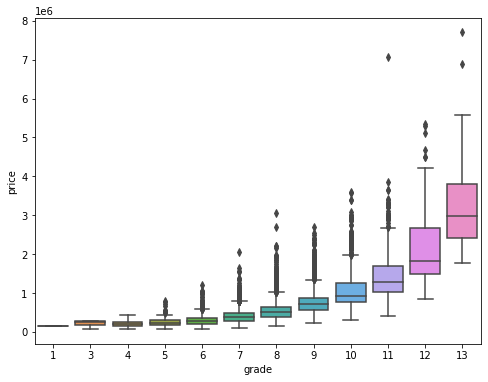

In [100]:
var = 'grade'
dat = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=dat)

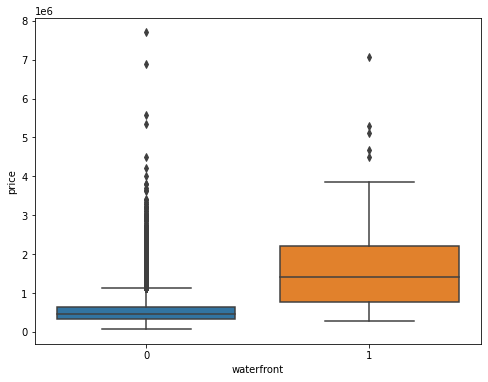

In [101]:
var = 'waterfront'
dat = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=dat)

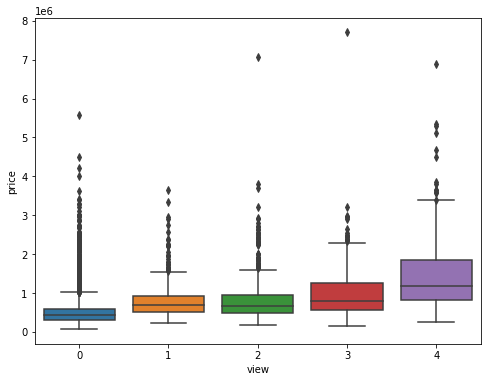

In [102]:
var = 'view'
dat = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=dat)

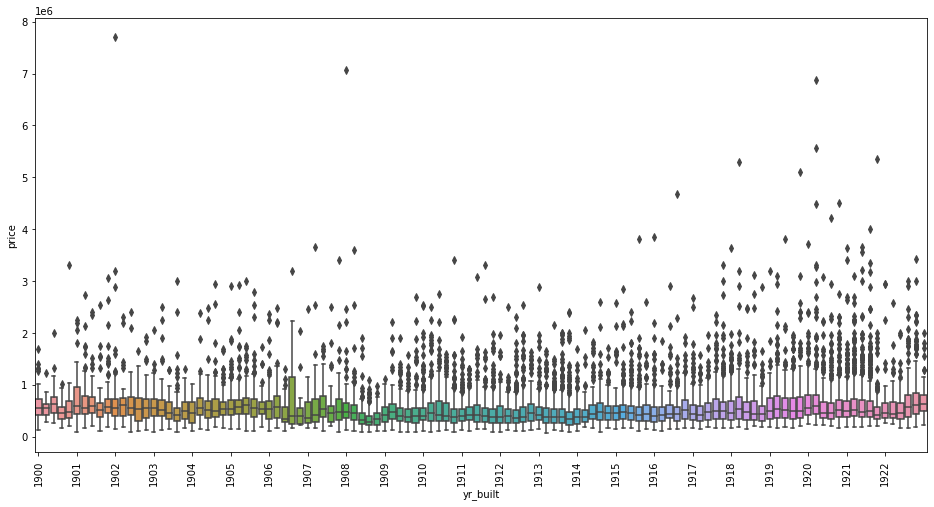

In [103]:
var = 'yr_built'
dat = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=dat)
plt.xticks(np.arange(0, 112, 5),rotation=90);


Si nous regardons les diagrammes ci-dessus, la note et le front de mer affectent visiblement le prix. En ce qui concerne la note (grade), le prix a l‚Äôair reli√© de fa√ßon lin√©aire puis de fa√ßon beaucoup plus radicale, presque exponentiel, √† partir d‚Äôun certain seuil : la note 10 environ. 
La vue semble √©galement avoir un effet sur le prix, mais de fa√ßon plus r√©duite.

Enfin, l'ann√©e de construction n'a pas d'incidence d√©terminante sur le prix.


   <h4><center>4.2- Correlations entre variables</center></h4>  

<Figure size 720x432 with 0 Axes>

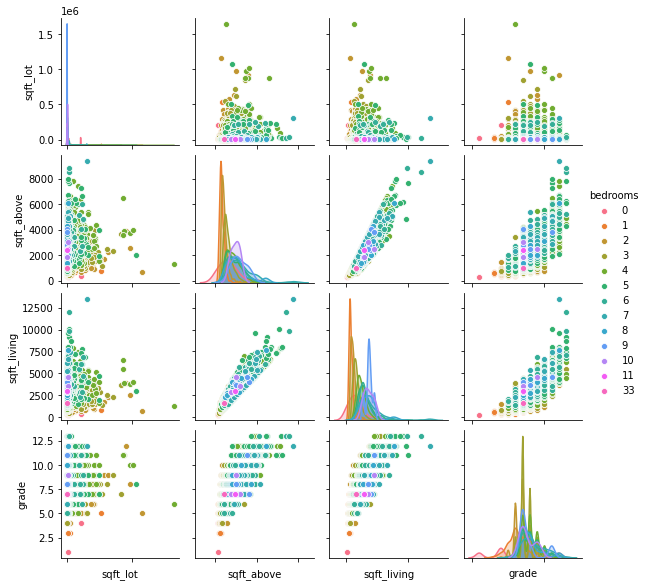

In [104]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(data[['sqft_lot','sqft_above',
                       'sqft_living','bedrooms','grade']]
                 ,hue='bedrooms',height=2)
g.set(xticklabels=[])

S'il y a une corr√©lation tr√®s √©lev√©e entre deux caract√©ristiques, les garder toutes les deux n'est pas une bonne id√©e, cela peut causer de l'overfitting. Par exemple, en cas d'overfitting, nous pouvons supprimer sqt_above ou sqt_living parce qu'ils sont fortement corr√©l√©s. Cette relation peut √™tre estim√©e lorsque nous examinons la signification des variables, mais pour √™tre s√ªr, il faut v√©rifier la matrice de corr√©lation. 


 <h4><center>Heatmap</center></h4> 

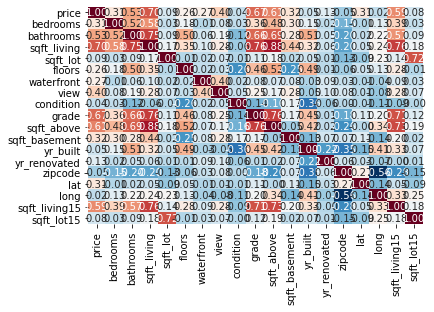

In [105]:
sns.heatmap(data=data.corr() , 
            annot=True ,  fmt='.2f' , cbar=False , cmap='RdBu_r')

Nous avons une visualisation claire des donn√©es les plus corr√©l√©es. Nous retrouvons les fortes corr√©lations observ√©es auparavent et en d√©couvrons d'autres, notamment sqft_living15, grade et sqft_above, que nous interpr√©tons ainsi : plus l'espace est grand, plus la note est meilleure. Cependant, il faut prendre garde √† ne pas supprimer automatiquement deux variables corr√©l√©es. Par exemple : le nombre salles de bains (bedrooms) et sqft_living  sont fortement corr√©l√©s mais la relation entre eux n‚Äôest pas la m√™me que celle entre sqft_living et sqft_above qui semblent bien plus proches dans leur d√©finition. 


   <h3><center>5- Les mod√®les de machine learning</center></h3>

<h4><center>La regression lin√©aire avec toutes les variables</center></h4> 

In [106]:
features = data.drop('price' , axis=1)
target = data['price']
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       target , test_size=0.15, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

On met les donn√©es √† √©chelle. 

Dans la r√©gression, il est souvent recommand√© de centrer les variables de sorte que les pr√©dicteurs aient une moyenne de 0. Il est ainsi plus facile d'interpr√©ter le terme d'intercept comme la valeur attendue de ùëåùëñ lorsque les valeurs des pr√©dicteurs sont fix√©es √† leurs moyennes. Sinon, l'intercept est interpr√©t√© comme la valeur attendue de ùëåùëñ lorsque les pr√©dicteurs sont fix√©s √† 0, ce qui peut ne pas √™tre une situation r√©aliste ou interpr√©table.

De plus, dans le cas ou un des pr√©dicteurs a une grande √©chelle, les coefficients de r√©gression peuvent √™tre d'un tr√®s petit ordre de grandeur, ce qui peut √™tre un peu g√™nant lorsque l'on lit les r√©sultats de l'ordinateur.

In [107]:
model = LinearRegression()
model_name = "Linear Regression"
model.fit(X_train , y_train)
prediction = model.predict(X_test)
    
r2 = r2_score(prediction , y_test)
mae = mean_absolute_error(prediction , y_test).round(2)
    
print(f'{model_name} R2 = {r2}')
print(f'{model_name} MAE = {mae}')

Linear Regression R2 = 0.5629698017727498
Linear Regression MAE = 124070.17


Le mod√®le explique au maximum pr√®s de 70% de la variation totale du mod√®le. On le voit en regardant le coefficient R2, qui d√©signe le ‚ÄúMultiple R-squared".

**Rappel:**
Le MAE (Mean Average Error) √©value la distance absolue entre observations et pr√©dictions, en prenant la moyenne sur toutes les observations. Nous utilisons la valeur absolue des distances afin que les erreurs n√©gatives soient correctement prises en compte. On cherche √† minimiser cette m√©trique.

Ici nous avons pris les 20 variables explicatives pr√©sentes. Avoir trop de variables dans un mod√®le n'est pas toujours une bonne chose car cela peut entra√Æner un surajustement et des r√©sultats plus mauvais lorsque nous voulons pr√©dire des valeurs pour un nouvel ensemble de donn√©es. Ainsi, si une variable n'am√©liore pas beaucoup notre mod√®le, ne pas l'ajouter peut √™tre un meilleur choix. C‚Äôest pourquoi nous tentons de savoir dans quelle mesure nous pouvons nous passer de certaines variables en les s√©lectionnant √† l‚Äôaide de deux crit√®res.

 <h3><center>Selection des variables explicatives </center></h3>

Pour s√©lectionner les meilleurs sous-ensembles de variables explicatives dans la r√©gression, il est possible de faire un choix descendant (pas √† pas) de variables √† la main. On enl√®verait la variable la moins significative puis on recalculerait les estimations et ainsi de suite. Il existe **en R** un package qui traite du choix de variables : le package leaps. La fonction regsubsets retourne, pour diff√©rents crit√®res (bic,  ùëÖ2, ùëÖ2ajust√©, Cp de Mallows, etc.), le meilleur mod√®le (si nbest=1) √† 1 variable explicative, √† 2 variables explicatives, ..., √† nvmax variables explicatives. En d'autres termes, le code ajuste initialement les mod√®les avec la premi√®re variable en x, les deux premi√®res, les trois premi√®res, et ainsi de suite, et calcul le crit√®re associ√©.

 <h3><center>Avec le crit√®re R2a</center></h3>

**Rappel :**

Le ùëÖ2ùëé indique √† quel point une ou plusieurs variables expliquent le pourcentage de variance de la variable d'int√©r√™t (ici, le prix).

Le crit√®re ùëÖ2 tend √† sur√©valuer la qualit√© de la r√©gression lin√©aire. Sa valeur augmente avec le nombre d'effets. Le ùëÖ2ùëé tente de corriger cela, en diminuant si un effet sp√©cifique n'am√©liore pas le mod√®le.

Le ùëÖ2ùëé est calcul√©e en divisant la valeur moyenne de l'erreur quadratique du r√©sidu par la valeur totale de l'erreur quadratique moyenne (qui correspond √† la variance de l'√©chantillon √† estimer). Le r√©sultat est ensuite soustrait de 1.

La valeur du ùëÖ2ùëé est toujours inf√©rieure ou √©gale √† la valeur de ùëÖ2. La valeur 1 indique un mod√®le qui pr√©voit parfaitement les valeurs du champ cible. Une valeur inf√©rieure ou √©gale √† 0 indique que le mod√®le n'a aucune capacit√© pr√©dictive. En g√©n√©ral, la valeur ùëÖ2ùëé se situe entre ces valeurs.



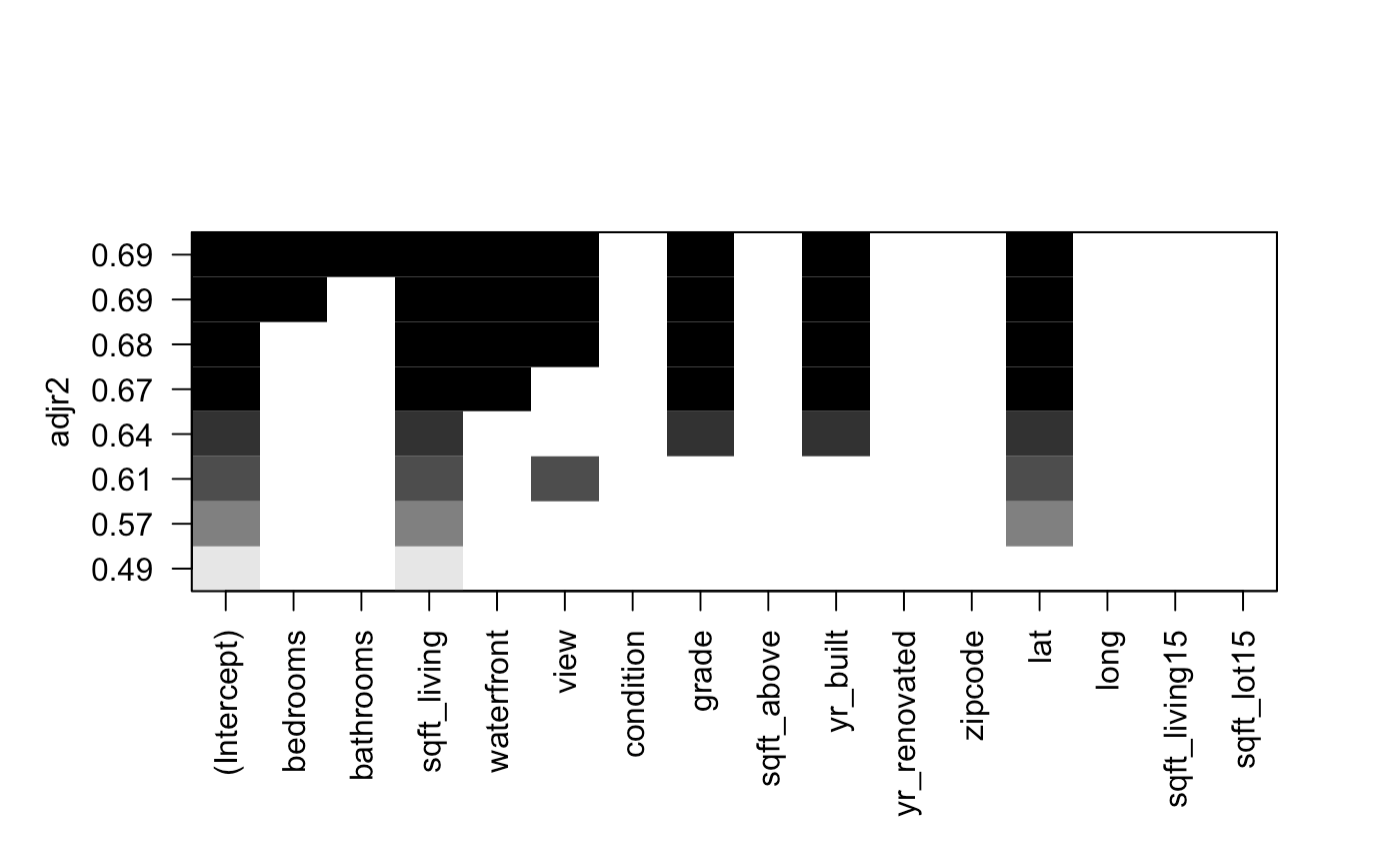

Le but est de maximiser le coefficient  ùëÖ2ùëé. Ici, le mod√®le qui performe le mieux contient :
*   la constante
*   bedroom
*   bathrooms
*   sqft_living
*   waterfront
*   view
*   grade
*   yr_built
*   lat

Note : on n'a pris que 15 des 20 variables explicatives. Nous avons effectu√©s cette pr√©s√©lection gr√¢ce aux visualisations de corr√©lation montr√©s ant√©rieurement.

### Pour le crit√®re BIC

**Rappel : le cri√®tre BIC**

Le BIC ou Schwartz‚Äôs information criterion a √©t√© d√©velopp√© par Gideon Schwarz en 1978.

Il est bas√©, en partie, sur la fonction de vraisemblance et est √©troitement li√© au crit√®re d'information d'Akaike (AIC).

Lors de l'ajustement de mod√®les, il est possible d'augmenter la vraisemblance en ajoutant des param√®tres, mais cela peut entra√Æner de l'overfitting. Le BIC tente de r√©soudre ce probl√®me en introduisant un terme de p√©nalit√© pour le nombre de param√®tres dans le mod√®le.

Formellement, 

BIC = k * ln(n)- 2 * ln(L) 

avec:
- k : nombre de param√®tres √† estimer. Ici, k = 15 + 1 + 1. 
- n : nombre d'observations
- L : maximum de la vraisemblance du mod√®le 

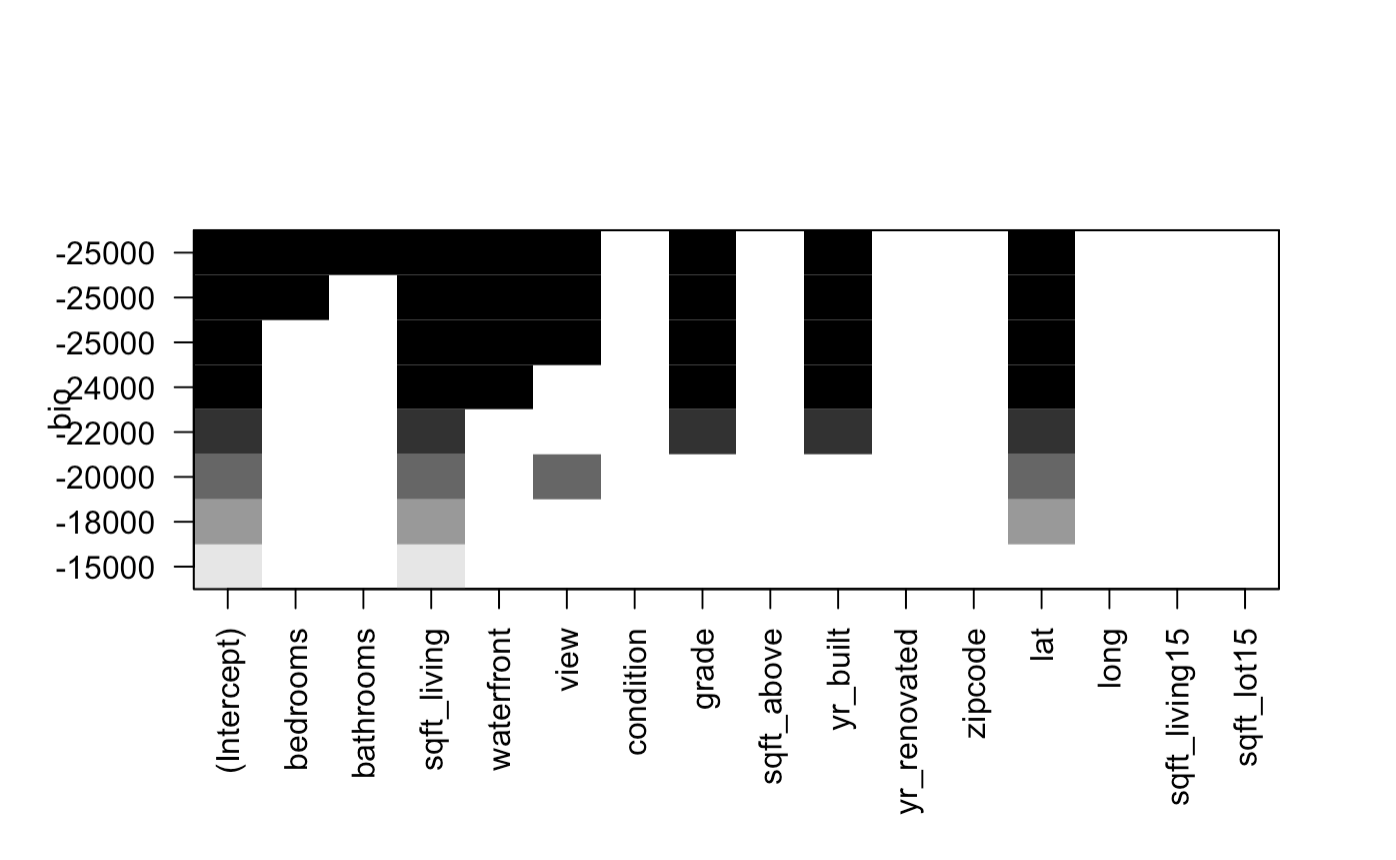

On cherche √† minimiser le crit√®re BIC. On choisit donc le mod√®le contenant: 
*   la constante
*   bedrooms
*   bathrooms
*   sqft_living
*   waterfront
*   view
*   grade
*   yr_built
*   lat

On retrouve les m√™mes variables que celles obtenues avec le crit√®re  ùëÖ2ùëé.
Effectuons un nouveau mod√®le de r√©gression en ne prenant que ces variables.





 <h2><center>Regression lin√©aire avec variables s√©lectionn√©es</center></h2> 

In [108]:
features = data.drop(['price', 'view','condition','zipcode','long', 
                     'sqft_living15', 'sqft_lot15','floors',
                     'yr_renovated'],axis=1)
target = data['price']
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       target , test_size=0.15 , shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train , y_train)
prediction = model.predict(X_test)
    
r2 = r2_score(prediction , y_test)
mae = mean_absolute_error(prediction , y_test).round(2)
    
print(f'{model_name} R2 = {r2}')
print(f'{model_name} MAE = {mae}')

Linear Regression R2 = 0.5305815744955407
Linear Regression MAE = 129392.41


Lors de nos essais, le r√©sultat √©tait g√©n√©ralement √©gal ou moins bon. Ici, 67% des variations sont expliqu√©es par les variables s√©lectionn√©es. 

Ce r√©sultat n'est toutefois pas surprenant, dans la mesure o√π il n‚Äôy a pas un tr√®s grand nombre de variables explicatives. Et qu‚Äô√† ce stade, les retirer revient plut√¥t √† une perte d‚Äôinformations qu‚Äôautre chose. Plus tard dans notre √©tude, on se penchera sur une PCA, pour savoir si certaines variables sont √† privil√©gier ou non.


 <h2><center> La r√©gularisation </center></h2> 

La r√©gularisation est con√ßue pour r√©soudre le probl√®me de l'overfitting et du underfitting. L'overfitting signifie une variance √©lev√©e, cette fonction s'adapte bien aux donn√©es d'apprentissage mais peut donner de mauvais r√©sultats pour l'ensemble de test. D'autre part, l‚Äôunderfitting signifie une faible variance et un mod√®le tr√®s simple. Cela peut √©galement entra√Æner de mauvais r√©sultats. Les rem√®des possibles sont l'ajustement manuel des caract√©ristiques ou l'utilisation de certains algorithmes de s√©lection de mod√®les, ce qui entra√Æne une charge de travail suppl√©mentaire. √Ä l'inverse, lorsque nous appliquons la r√©gularisation, toutes les caract√©ristiques sont conserv√©es et le mod√®le ajuste Œ∏j . Cela fonctionne particuli√®rement lorsque nous avons beaucoup de caract√©ristiques l√©g√®rement utiles. Il existe deux types de r√©gularisation largement utilis√©s (Ridge et Lasso) et dans cette section, on les a utilis√©es.


G√©n√©ralement, on utilise la r√©gression ridge quand il y beaucoup de variables explicatives d'importance moyenne. Et on utilise lasso quand il n'y a que peu de variables avec un effet important. Notre dataset ne se situe pas de fa√ßonn √©vidente d'un c√¥t√© ou de l'autre, nous testons les deux. 

 <h4><center>Regression Ridge</center></h4> 
La r√©gression ridge est appel√©e r√©gularisation L2 et en ajoutant une p√©nalit√©, on obtient l'√©quation suivante

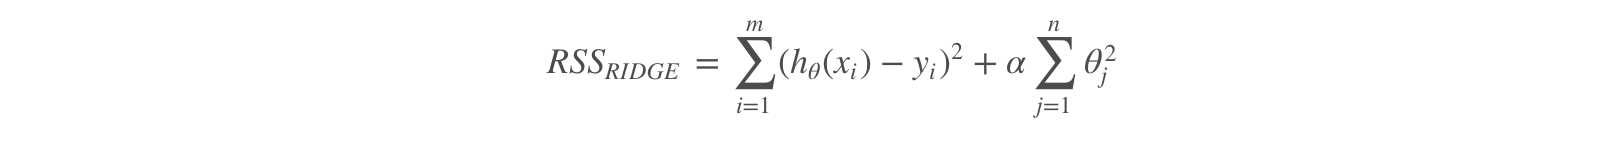

En changeant la valeur Œ± nous pouvons contr√¥ler l'importance de la r√©gularisation. Lorsque nous augmentons Œ± la r√©gularisation augmente et l'inverse est √©galement valable. 
En cons√©quence, on a s√©lectionn√© diff√©rentes valeurs de Œ± et on s‚Äôest servis de notre r√©gression lin√©aire sans r√©gularisation afin d'observer facilement les diff√©rences.



In [110]:
features = data.drop('price' , axis=1)
target = data['price']
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       target , test_size=0.15 , shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lis_evaluate = []

def model_prediction(model , model_name) : 
    
    model.fit(X_train , y_train)
    prediction = model.predict(X_test)
    
    r2 = r2_score(prediction , y_test)
    mae = mean_absolute_error(prediction , y_test).round(2)
    
    print(f'{model_name} R2 = {r2}')
    print(f'{model_name} MAE = {mae}')
    lis_evaluate.append([model_name , r2 , mae])

In [111]:
model_prediction(LinearRegression() , 'LinearRegression()')

LinearRegression() R2 = 0.5342668091363357
LinearRegression() MAE = 124866.61


In [116]:
model_prediction(Ridge() , 'Ridge')

Ridge R2 = 0.5342417140536792
Ridge MAE = 124864.27



 <h4><center>Regression Lasso</center></h4> 

La r√©gression Lasso est appel√©e r√©gularisation L1 et elle est d√©finie comme suit

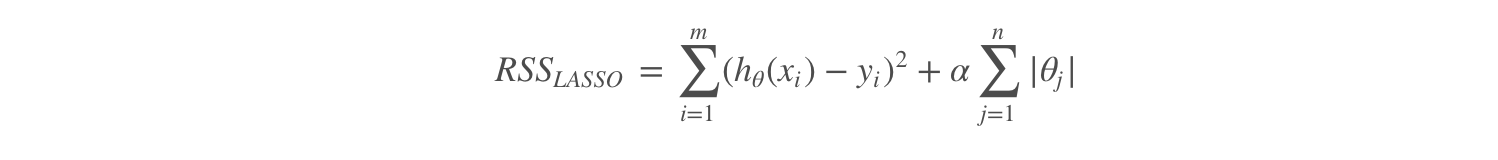

La principale diff√©rence entre le ridge et le lasso est la p√©nalit√©, mais Œ± fonctionne de la m√™me mani√®re.


In [113]:
model_prediction(Lasso() , 'Lasso')

Lasso R2 = 0.5342672126055739
Lasso MAE = 124866.56


In [114]:
result = pd.DataFrame(lis_evaluate , columns=['Model' , 'R2' , 'MAE']).sort_values('R2' , ascending=False)
result

Model        R2        MAE
2               Lasso  0.534267  124866.56
0  LinearRegression()  0.534267  124866.61
1               Ridge  0.534242  124864.27

Les r√©sultats sont tr√®s proches. La r√©gression lin√©aire sans r√©gularisation semble avoir le meilleur rapport entre MAE et R2.

 <h3><center>Autres mod√®les de r√©gression : SVR, XGBoost, Bagging, Gradient Boosting, Decision Tree</center></h3> 
 
### Scores et Temps d'execution

In [115]:
rfr = RandomForestRegressor()
svr = SVR(kernel="rbf")
xgb = XGBRegressor()
br = BaggingRegressor()
gb = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()

Regressors = [br,gb,rfr,svr,xgb,dtr]
accuracy=[]
timeTaken=[]
for model in Regressors:
    start = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy.append(r2_score(y_test,y_pred))
    end = time.time()
    timeTaken.append((end-start) * 10**3)

name =[]
for i in Regressors :
     name.append(i.__class__.__name__) 
data = {'Algorithm': name , 'Score': accuracy, 'Time taken' : timeTaken}
result = pd.DataFrame(data).sort_values('Score' , ascending=False)
result

Algorithm     Score    Time taken
4               XGBRegressor  0.899981   2543.339491
2      RandomForestRegressor  0.873856  21449.525833
0           BaggingRegressor  0.872846   1786.795855
1  GradientBoostingRegressor  0.844265   3898.626089
5      DecisionTreeRegressor  0.738910    367.993832
3                        SVR -0.046411  22380.646467

On voit que le RandomForestRegressor a le meilleur score : 88% de pr√©cision. Cependant, il prend un temps d'execution bien plus important. 
Au contraire, en voulant minimiser le temps, on perd grandement en pr√©cision : voir l'arbre de d√©cision. 

Il faut trouver un compromis, et cela semble ce trouver dans le XGBRegressor. 

<h3><center>learning curve des mod√®les : cas de XGBRegressor</center></h3>  

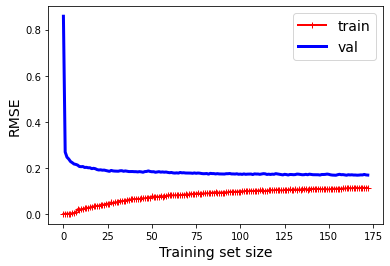

In [27]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train),100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     
    
plot_learning_curves(XGBRegressor(),features,target)

En faisant une ACP, l'objectif √©tait presque similaire √† nos algorithmes de s√©lection de variables ant√©rieurs. Il √©tait de voir si en se d√©barrassant de certaines variables, on aurait des r√©sultats int√©ressants. Cela n'a pas √©t√© le cas. Nous poursuivons donc avec gridSearch et la validation crois√©e.


En utilisant simplement les param√®tres par d√©faut, nous sommes en mesure d'obtenir un score maximal d'environ 88%. En effectuant cette gridSearchCV, nous esp√©rons trouver les meilleurs hyperparam√®tres et optimiser notre score, notamment pour le random Forest et XGBoost, qui se sont av√©r√©s plus int√©ressants. 

<h2><center>Analyse en Composante Principale</center></h2>  


**Principale motivation** :  Faut-il d√©gager certaines variables ?

L'analyse en composantes principales (ACP) permet de r√©duire le nombre de dimensions d'un jeu de donn√©es d√©crit par un grand nombre de variables. Cela permet une visualisation simplifi√©e et une acc√©l√©ration des calculs.

Il est vrai qu'on a pas un nombre assez important de variables mais pour une application du cours, on va s'amuser √† le faire!!!


In [68]:
features_centred = scaler.fit_transform(features)
pca = PCA(n_components=14)
X_pca = pca.fit_transform(features_centred)

In [79]:
print(pca.singular_values_)

[336.17652698 218.12353318 199.68128358 171.81345514 161.41515062
 147.23256437 137.38001284 134.43506246 119.19842065 113.98110635
 103.8108801   93.49805003  83.78850451  78.52733284]


In [80]:
print(pca.components_) 

[[ 2.46351747e-01  3.64256998e-01  3.94826377e-01  1.04416009e-01
   2.36703292e-01  4.60816743e-02  1.12841387e-01 -8.64162890e-02
   3.67614929e-01  3.93105742e-01  8.38216579e-02  2.53105189e-01
   2.02307531e-03 -1.61413071e-01 -3.74730477e-03  1.88793665e-01
   3.55855123e-01  1.11241918e-01]
 [ 1.64259784e-01  8.85942832e-02  1.96031798e-01 -1.43449865e-01
  -1.35896559e-01  2.10314591e-01  3.44723111e-01  2.03094279e-01
   9.04539635e-02 -1.89094807e-02  4.42190300e-01 -3.29295669e-01
   1.82091350e-01  3.34901214e-01  2.35728682e-01 -3.75610331e-01
   8.03339411e-02 -1.49846222e-01]
 [-9.56387350e-03 -1.09932335e-01  3.82562165e-02  5.47131960e-01
  -3.36075788e-01  1.10271038e-01  1.59218014e-01  2.41210767e-01
  -9.25627378e-02 -5.24075118e-02  1.77448464e-01 -2.02172795e-01
   5.11417514e-02 -1.61915004e-01 -1.65687477e-01  1.73451446e-01
   4.86182770e-02  5.53133994e-01]
 [-3.37384447e-01 -5.44563946e-02 -9.36292750e-02  2.52414102e-01
   2.98756356e-01  3.55079181e-01  2.

In [81]:
print(f"La variance expliqu√©e par composante :{pca.explained_variance_ratio_}")
total_explained_variance = pca.explained_variance_ratio_.sum()
print(f"La variance totale expliqu√©e :{total_explained_variance}")

La variance expliqu√©e par composante :[0.29050072 0.12229747 0.10249134 0.07587991 0.0669732  0.05572117
 0.04851316 0.04645554 0.03652191 0.03339475 0.02770117 0.02247075
 0.01804602 0.01585091]
La variance totale expliqu√©e :0.9628180055523771


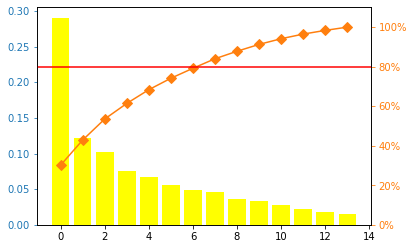

In [82]:
def visualisation(data) :
    from matplotlib.ticker import PercentFormatter
    import numpy as np
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="yellow")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()
visualisation(pca.explained_variance_ratio_)

Plus le nombre de composantes grandit, moins la variance expliqu√©e par la composante ajout√©e est.


La variance expliqu√©e par les *14* composantes est de :0.9628180055523771

 <h2><center>Quelques pipelines pour combinants ACP et quelques algorithmes</center></h2>  
 

In [117]:
xgbr_pipe = Pipeline([
 ('pca', PCA()),
 ('xgbr', XGBRegressor())])

rdf_pipe = Pipeline([
 ('pca', PCA()),
 ('rfr', RandomForestRegressor())])

gbr_pipe = Pipeline([
 ('pca', PCA()),
 ('gbr', GradientBoostingRegressor())])
    

svr_pipe = Pipeline([
 ('pca', PCA()),
 ('svr', SVR())])


br_pipe=svr_pipe = Pipeline([
 ('pca', PCA()),
 ('svr', BaggingRegressor())])


pipes = [xgbr_pipe,gbr_pipe,svr_pipe,rdf_pipe,br_pipe]
accuracy=[]
for model in pipes:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy.append(r2_score(y_test,y_pred))

names =["XGBRegressor","GradientBoosting","svr","RandomForestRegressor","BaggingRegressor"]
data = {'Algorithm': names , 'Score': accuracy }
result = pd.DataFrame(data)
result.sort_values('Score' , ascending=False)

Algorithm     Score
3  RandomForestRegressor  0.823307
2                    svr  0.819357
4       BaggingRegressor  0.797060
0           XGBRegressor  0.793415
1       GradientBoosting  0.791418

R√©sultat : √ßa n‚Äôa pas am√©lior√© les scores. voire √ßa a donn√© un r√©sultat moins int√©ressant. Cela, encore une fois, est assez ais√© √† comprendre, √©tant donn√© que l‚Äôon n‚Äôa pas beaucoup de variables explicatives √† l‚Äôorigine.  

<h2><center>Raffinement des hyper-param√®tres pour le mod√®le Random Forest</center></h2>


Nous allons maintenant utiliser gridsearchCV pour trouver les meilleurs hyperparam√®tres et optimiser les scores obtenus.

<h2><center>Grid Search pour Random Forest</center></h2>

Grid search est un algorithme de recherche exhaustif en cela qu‚Äôil √©value toutes les combinaison d‚Äôhyperparam√®tres dans un espace de recherche que l‚Äôon a pr√©d√©fini. Donc quand il y en a beaucoup, √ßa peut prendre du temps.

In [ ]:
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rfr = GridSearchCV(rfr , param_grid = param_rf ,cv =5)
grid_rfr.fit(X_train,y_train)


print("parameters for Random Forest:", grid_rfr.best_params_)

<h2><center> Random Search pour le mod√®le Random Forest</center></h2>

Random Search s√©lectionne al√©atoirement certaines combinaisons d‚Äôhyperparam√®tres parmi l‚Äôensemble des combinaisons possibles. Donc en un temps limit√©, une plus large vari√©t√© de combinaisons peut √™tre test√©e. √Ä d√©faut parfois de la meilleure combinaison, qui peut ne pas se trouver dans la s√©lection.



In [ ]:
rfr = RandomForestRegressor(min_samples_leaf= 2, n_estimators= 350)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print(r2_score(y_test,y_pred))

param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,9)],
    "colsample_bytree": [i/10.0 for i in range(3,5)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}


random_search = RandomizedSearchCV(estimator=xgb, 
                           param_distributions=param_grid, 
                           n_iter=48, 
                           n_jobs=-1, 
                           cv=2, 
                           verbose=0)
random_result = random_search.fit(X_train, y_train)

random_result

print(f'The best score is {random_result.best_score_:.4f}')
print(f'The best hyperparameters are {random_result.best_params_}')
random_predict = random_search.predict(X_test)

score= r2_score(y_test, random_predict)
print(f'The score for the xgboost random search is {score}')

space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

def objective(params):
    rfr = RandomForestRegressor(min_samples_leaf= 2, n_estimators= 350)     
    scores = cross_val_score(rfr, X_train, y_train, cv=2, scoring='r2', n_jobs=-1)
    best_score = max(scores)
    loss = - best_score
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
bayes_trials = Trials()
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

print(space_eval(space, best))## Bayesian Optimization Hyperopt pour le mod√®le Random Forest 

L‚Äôoptimisation Bay√©sienne utilise les r√©sultats de l‚Äô√©tape pr√©c√©dente pour d√©cider quelle combinaison d‚Äôhyper-param√®tres elle va tester ensuite. √Ä la diff√©rence de Grid/Random search, l‚Äôoptimisation Bay√©sienne ne consid√®re pas les combinaisons d‚Äôhyper-param√®tres ind√©pendamment les uns des autres.


In [ ]:
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

def objective(params):
    rfr = RandomForestRegressor(min_samples_leaf= 2, n_estimators= 350)     
    scores = cross_val_score(rfr, X_train, y_train, cv=2, scoring='r2', n_jobs=-1)
    best_score = max(scores)
    loss = - best_score
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
bayes_trials = Trials()
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

print(space_eval(space, best))

In [ ]:
rfr_bo = RandomForestRegressor(colsample_bytree = 0.6, 
                               gamma = 0.0, 
                               learning_rate = 0.01, 
                               max_depth = 15, 
                               reg_alpha = 0.01, 
                               reg_lambda = 1e-05).fit(X_train,y_train)
                          
bayesian_opt_predict = rfr_bo.predict(X_test)
score = r2_score(y_test, bayesian_opt_predict)
print(f"Le r2_score pour l'optimisation Bay√©sienne de la Random Forest est {score}")

<h2><center> Optimisation bay√©sienne pour le mod√®le XGBoost</center></h2>


In [ ]:
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

def objective(params):
    xg = XGBRegressor(seed=0, **params)
    scores = cross_val_score(xgb, X_train, y_train, cv=2, scoring='r2', n_jobs=-1)
    best_score = max(scores)
    loss = - best_score
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
bayes_trials = Trials()
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

xgboost_bo = XGBRegressor(seed=0, 
                           colsample_bytree=0.8, 
                           gamma=0.4, 
                           learning_rate=0.1, 
                           max_depth=12, 
                           reg_alpha=0.01,
                           reg_lambda=10
                           ).fit(X_train,y_train)
                          
bayesian_opt_predict = xgboost_bo.predict(X_test)
score = r2_score(y_test, bayesian_opt_predict)
print(f"Le r2_score pour l'optimisation Bay√©sienne de la Random Forest est{score}")

On voit que les scores sont am√©lior√©s.

<h2><center> R√©seau de neurones </center></h2>

In [54]:
import tensorflow as tf 
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=18,),
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

start = time.time()
model.compile(loss="mse",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history=model.fit(X_train, y_train,          
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=100)
end = time.time()

timeTaken1 = end-start

Epoch 1/100
144/144 [==============================] - 1s 4ms/step - loss: 57.1437 - mae: 6.0223 - val_loss: 6.3514 - val_mae: 1.9080
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 4.1086 - mae: 1.4867 - val_loss: 2.6769 - val_mae: 1.1666
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 2.0580 - mae: 1.0476 - val_loss: 1.6411 - val_mae: 0.9127
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 1.2857 - mae: 0.8286 - val_loss: 1.0714 - val_mae: 0.7357
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.8418 - mae: 0.6730 - val_loss: 0.7453 - val_mae: 0.6142
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 0.5733 - mae: 0.5534 - val_loss: 0.5236 - val_mae: 0.5091
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.4001 - mae: 0.4602 - val_loss: 0.3728 - val_mae: 0.4242
Epoch 8/100
144/144 [==============================] - 0s 2ms/step -

In [ ]:
start = time.time()
preds = model.predict(X_test)
print('R score is :', r2_score(y_test, preds))

In [ ]:
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R score is :', r2_score(y_test, y_pred))
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'b')
timeTaken2 = end - start
print('Time taken for train:',timeTaken1))
print('Time taken for prediction:',timeTaken2))

Pour les r√©seaux de neurones, le score est assez faible par rapport aux autres. Cela n'est pas √©tonnant puisqu'on travaille sur une base de donn√©es tabul√©e de taille relativement moyenne, l√† o√π les r√©seaux de neurones apportent un r√©el avantage pour les donn√©es non structur√©es (donn√©es multim√©dia : images, donn√©es m√©t√©o ou g√©ospatiales, etc.)

<h2><center> Conclusion et perspectives </center></h2>


Nous avons conscience qu'il n'y a pas de meilleur mod√®le √† proprement parler. Tous pourraient √™tre utiles selon la situation dans laquelle on s'inscrit. Le nombre de donn√©es, par exemple, rend plus ou moins important le crit√®re de temps d'execution. Ici, pour moins de 20000 donn√©es, nous pourrions prendre le Random Forest sans que cela soit trop couteux. Mais dans un cadre plus industriel, XGBoost avec tels param√®tres semble √™tre le meilleur. 

Tout au long de cette √©tude, nous nous sommes employ√©s √† estimer la valeur des logements √† partir des donn√©es sur les caract√©ristiques du parc immobilier de la r√©gion. Cependant, cette proc√©dure ne tient pas compte du prix des maisons voisines, qui est une source d'information potentiellement importante ‚Äì des corr√©lations existant entre les prix des maisons et celles de leurs voisines. On pourrait ajouter √† notre objectif celui de savoir en quoi les corr√©lations existant entre les prix des maisons voisines peuvent √™tre incorpor√©es lors de la pr√©diction des prix des maisons. Repr√©sentent-elles un indicateur fiable ? Voil√† √† nos yeux une question qui vaudrait la peine d'√™tre explor√©e. 